<a href="https://colab.research.google.com/github/Jerome-de/CLUSTERING-ALGORITHMS/blob/main/WINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/wine csv')

In [5]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [6]:
df.duplicated().sum()

np.int64(937)

In [7]:
df.drop_duplicates(inplace= True)

In [8]:
df.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3961 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 402.3 KB


In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [11]:
import plotly.express as px
labels = {
    'x' : 'volatile acidity',
    'y' : 'sulphates',
    'z' : 'alcohol'
}
plot = px.scatter_3d(df, x= 'volatile acidity', y = 'sulphates', z = 'alcohol', labels = labels, height = 800, width = 1200)
plot.show()

# K-MEANS CLUSTRING

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [13]:
df1 = df[['volatile acidity','sulphates','alcohol']]

In [14]:
df1

,volatile acidity,sulphates,alcohol
0,0.27,0.45,8.8
1,0.30,0.49,9.5
2,0.28,0.44,10.1
3,0.23,0.40,9.9
6,0.32,0.47,9.6
...,...,...,...
4893,0.21,0.50,11.2
4894,0.32,0.46,9.6
4895,0.24,0.46,9.4
4896,0.29,0.38,12.8


In [15]:
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1)

In [16]:
inertia = []
num_cluster = [i for i in range(2,11) ]
sil_score = []

for i in num_cluster:
  km =KMeans(n_clusters= i, random_state= 42)
  km.fit(df1_scaled)
  inertia.append(km.inertia_)
  sil_score.append(silhouette_score(df1_scaled,km.labels_))

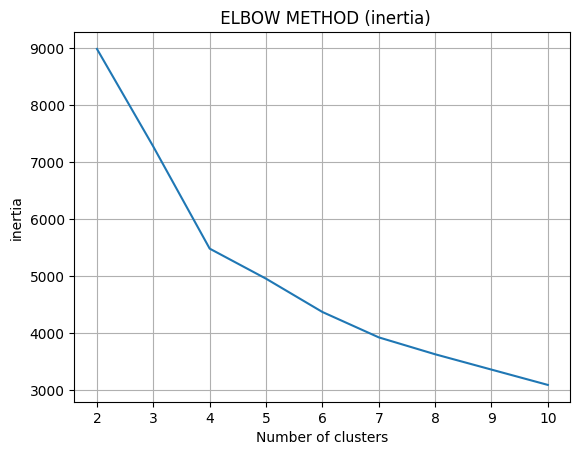

In [17]:
sns.lineplot(y = inertia, x = num_cluster)
plt.grid(True)
plt.title(' ELBOW METHOD (inertia)')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

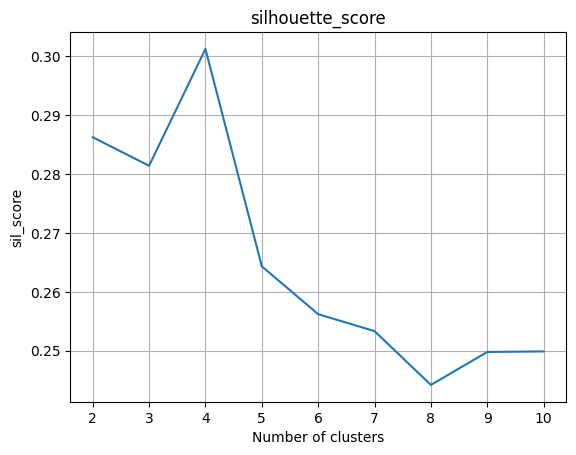

In [18]:
sns.lineplot(y = sil_score, x= num_cluster)
plt.grid(True)
plt.title('silhouette_score')
plt.xlabel('Number of clusters')
plt.ylabel('sil_score')
plt.show()

In [19]:
k = KMeans(n_clusters= 4, random_state= 42)
k.fit(df1_scaled)

KMeans(n_clusters=4, random_state=42)

In [20]:
df['cluster1'] = k.labels_

In [21]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster1
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [22]:
import plotly.express as px
labels = {
    'x' : 'volatile acidity',
    'y' : 'sulphates',
    'z' : 'alcohol'
}
plot = px.scatter_3d(df, x= 'volatile acidity', y = 'sulphates', z = 'alcohol', labels = labels, height = 800, width = 1200, color = 'cluster1')
plot.show()

# **DBSCAN CLUSTERING**

In [23]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [24]:
min_samples = 6
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(df1_scaled)
distances, indices = neighbors_fit.kneighbors(df1_scaled)

In [25]:
k_distances = np.sort(distances[:, -1])

In [26]:
k_distances

array([0.08217449, 0.08217449, 0.08217449, ..., 2.63428886, 2.84131907,
       2.85895342])

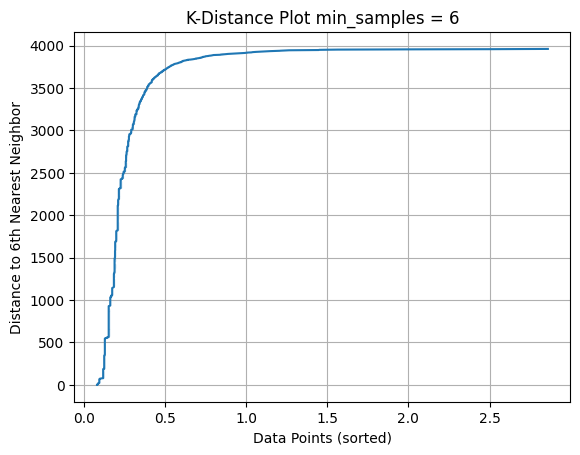

In [27]:
sns.lineplot(y = range(len(k_distances)), x= k_distances)
plt.grid(True)
plt.title('K-Distance Plot min_samples = 6')
plt.xlabel('Data Points (sorted)')
plt.ylabel(f"Distance to {min_samples}th Nearest Neighbor")
plt.show()

In [28]:
db = DBSCAN(eps=0.5, min_samples=6)
db.fit(df1_scaled)

DBSCAN(min_samples=6)

In [29]:
df['dbscan_cluster'] = db.labels_

In [30]:
import plotly.express as px
labels = {
    'x' : 'volatile acidity',
    'y' : 'sulphates',
    'z' : 'alcohol'
}
plot = px.scatter_3d(df, x= 'volatile acidity', y = 'sulphates', z = 'alcohol', labels = labels, height = 800, width = 1200, color='dbscan_cluster')
plot.show()